CARGA

In [1]:
import pandas as pd

# Cargar el dataset
file_path = 'cdc_raw_data.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas y la información del dataset
print("Dimensiones del dataset:", df.shape)
print("Primeras filas:\n", df.head())
print("Información del dataset:\n")
df.info()


Dimensiones del dataset: (1000, 6)
Primeras filas:
    year                                    _113_cause_name      cause_name  \
0  2012  Nephritis, nephrotic syndrome and nephrosis (N...  Kidney disease   
1  2017  Nephritis, nephrotic syndrome and nephrosis (N...  Kidney disease   
2  2016  Nephritis, nephrotic syndrome and nephrosis (N...  Kidney disease   
3  2013  Nephritis, nephrotic syndrome and nephrosis (N...  Kidney disease   
4  2000  Intentional self-harm (suicide) (*U03,X60-X84,...         Suicide   

                  state  deaths  aadr  
0               Vermont      21   2.6  
1               Vermont      29   3.3  
2               Vermont      30   3.7  
3               Vermont      30   3.8  
4  District of Columbia      23   3.8  
Información del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year       

Detección y Tratamiento de Valores Faltantes

In [2]:
# Resumen de los valores faltantes
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_summary = pd.DataFrame({'missing_count': missing_data, 'missing_percentage': missing_percentage})

print("Valores faltantes:\n", missing_summary)

# Dado que no hay muchas columnas, se puede optar por eliminar las filas con valores faltantes
df_cleaned = df.dropna()
print("Dimensiones después de limpiar valores nulos:", df_cleaned.shape)


Valores faltantes:
                  missing_count  missing_percentage
year                         0                 0.0
_113_cause_name              0                 0.0
cause_name                   0                 0.0
state                        0                 0.0
deaths                       0                 0.0
aadr                         0                 0.0
Dimensiones después de limpiar valores nulos: (1000, 6)


Análisis Descriptivo de Variables

In [3]:
# Resumen estadístico de las variables numéricas
print("\nResumen estadístico de variables numéricas:\n", df_cleaned.describe())

# Distribución de variables categóricas
print("\nDistribución de 'cause_name':\n", df_cleaned['cause_name'].value_counts())


Resumen estadístico de variables numéricas:
               year        deaths         aadr
count  1000.000000   1000.000000  1000.000000
mean   2007.702000   1160.494000     9.931500
std       5.564185   3832.087922     1.966541
min    1999.000000     21.000000     2.600000
25%    2003.000000    151.750000     8.700000
50%    2008.000000    458.000000    10.300000
75%    2012.000000    949.750000    11.500000
max    2017.000000  39518.000000    12.500000

Distribución de 'cause_name':
 cause_name
Suicide                    453
Kidney disease             398
Influenza and pneumonia    119
Alzheimer's disease         29
Diabetes                     1
Name: count, dtype: int64


Detección de Outliers

In [4]:
# Función para detectar outliers usando IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detectar outliers en 'deaths' y 'aadr'
outliers_deaths = detect_outliers(df_cleaned, 'deaths')
outliers_aadr = detect_outliers(df_cleaned, 'aadr')

print("Outliers detectados en 'deaths':\n", outliers_deaths)
print("Outliers detectados en 'aadr':\n", outliers_aadr)

Outliers detectados en 'deaths':
      year                                    _113_cause_name      cause_name  \
103  2011  Nephritis, nephrotic syndrome and nephrosis (N...  Kidney disease   
115  2013  Nephritis, nephrotic syndrome and nephrosis (N...  Kidney disease   
116  2012  Nephritis, nephrotic syndrome and nephrosis (N...  Kidney disease   
120  2002  Nephritis, nephrotic syndrome and nephrosis (N...  Kidney disease   
143  2004  Nephritis, nephrotic syndrome and nephrosis (N...  Kidney disease   
..    ...                                                ...             ...   
926  2001  Nephritis, nephrotic syndrome and nephrosis (N...  Kidney disease   
936  2011  Intentional self-harm (suicide) (*U03,X60-X84,...         Suicide   
951  2002  Nephritis, nephrotic syndrome and nephrosis (N...  Kidney disease   
980  2015  Intentional self-harm (suicide) (*U03,X60-X84,...         Suicide   
999  2005  Intentional self-harm (suicide) (*U03,X60-X84,...         Suicide   

     

Visualización de Datos

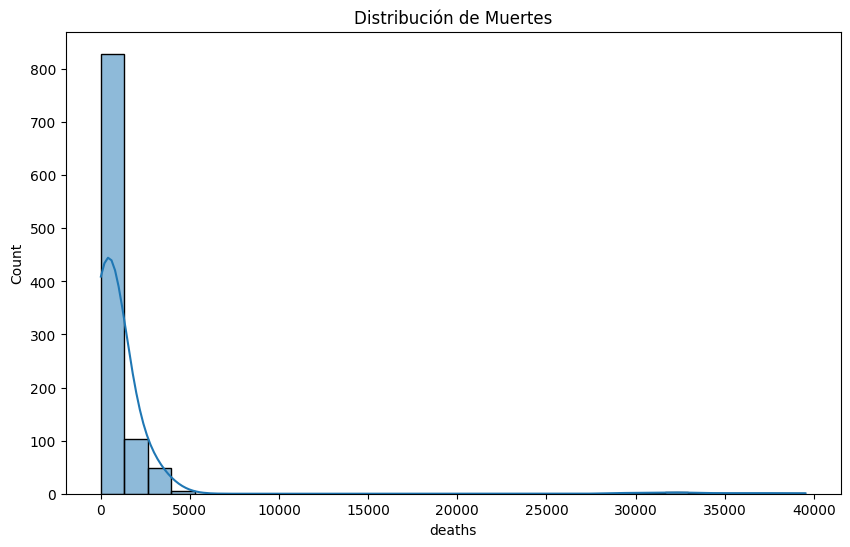

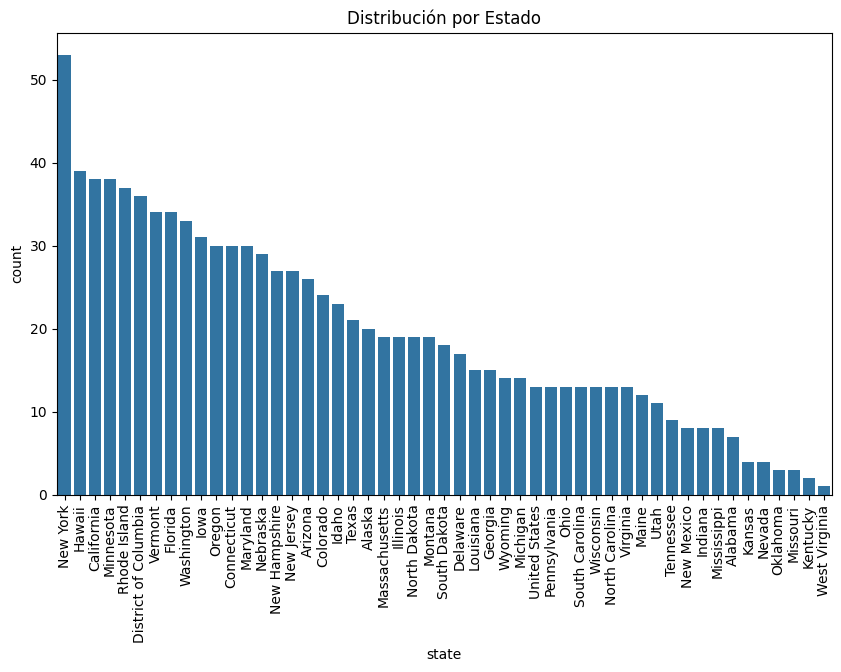

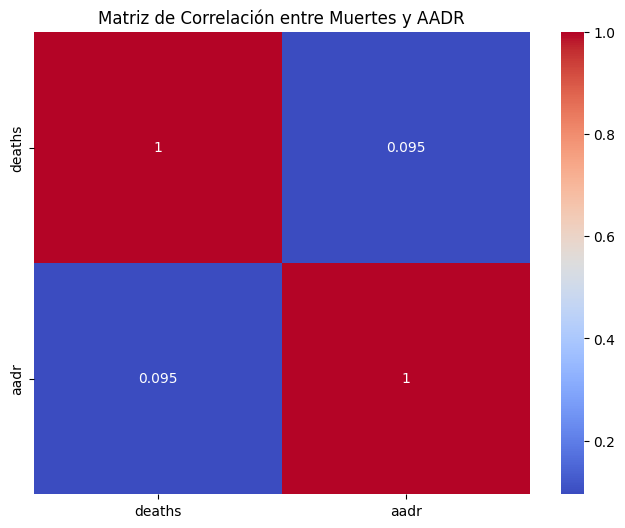

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de la variable 'deaths'
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['deaths'], bins=30, kde=True)
plt.title('Distribución de Muertes')
plt.show()

# Gráfico de barras para 'state'
plt.figure(figsize=(10, 6))
sns.countplot(x='state', data=df_cleaned, order=df_cleaned['state'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribución por Estado')
plt.show()

# Matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned[['deaths', 'aadr']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Muertes y AADR')
plt.show()

Distribución de muertes por año

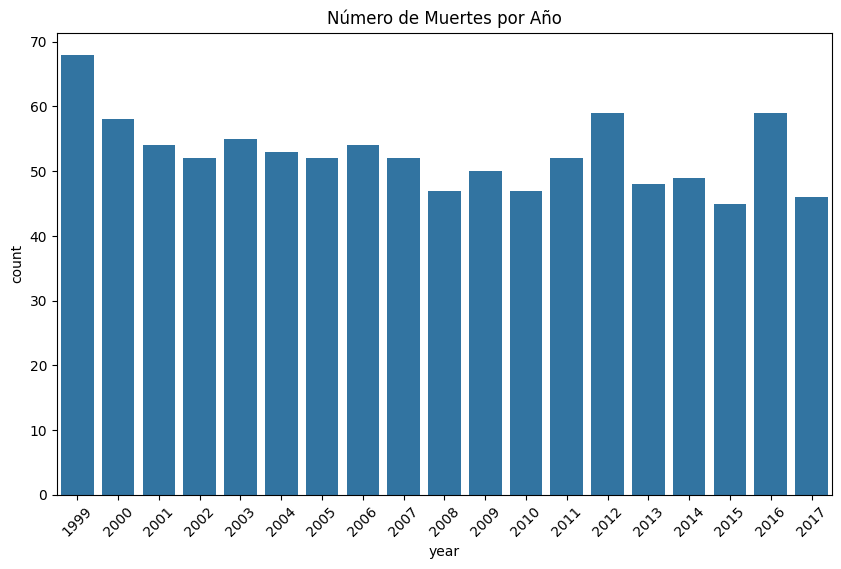

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df_cleaned, order=df_cleaned['year'].value_counts().sort_index().index)
plt.title('Número de Muertes por Año')
plt.xticks(rotation=45)
plt.show()

Principales 10 causas de muerte en los últimos 5 años

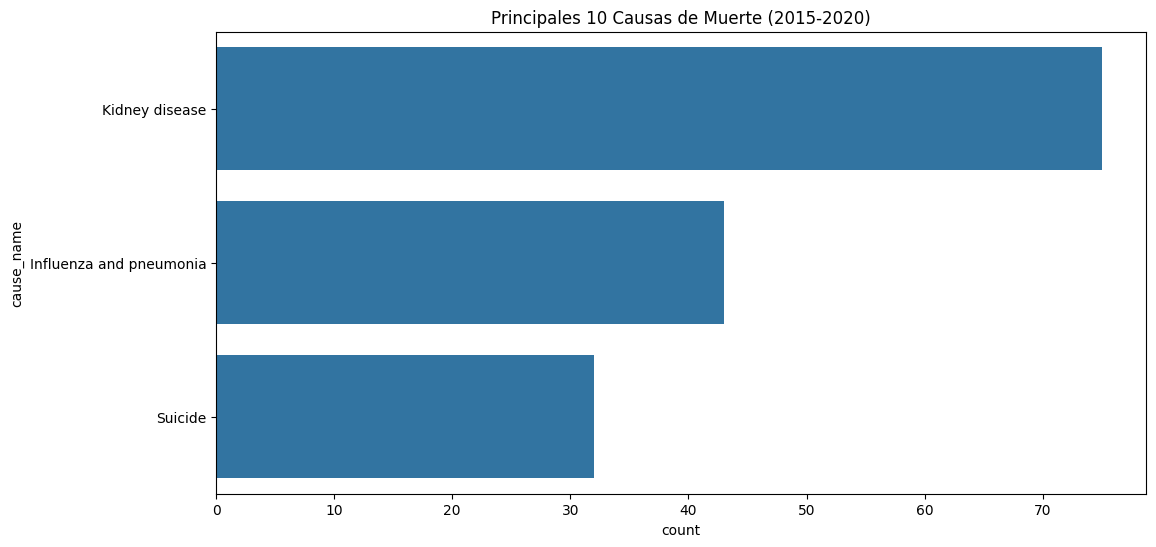

In [7]:
recent_years = df_cleaned[df_cleaned['year'] >= 2015]
top_causes = recent_years['cause_name'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 6))
sns.countplot(y='cause_name', data=recent_years[recent_years['cause_name'].isin(top_causes)], 
              order=recent_years['cause_name'].value_counts().nlargest(10).index)
plt.title('Principales 10 Causas de Muerte (2015-2020)')
plt.show()

Tendencias de muertes para las principales causas (agrupación por año)

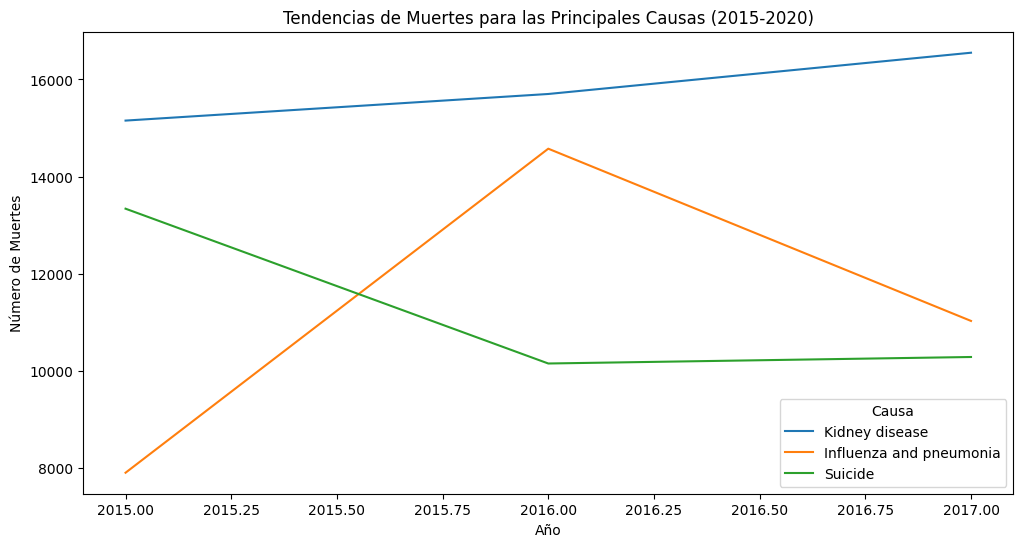

In [8]:
# Tendencias de muertes para las principales causas
plt.figure(figsize=(12, 6))
for cause in top_causes:
    cause_trend = recent_years[recent_years['cause_name'] == cause].groupby('year')['deaths'].sum()
    sns.lineplot(x=cause_trend.index, y=cause_trend.values, label=cause)

plt.title('Tendencias de Muertes para las Principales Causas (2015-2020)')
plt.ylabel('Número de Muertes')
plt.xlabel('Año')
plt.legend(title='Causa')
plt.show()

Análisis de correlación detallada entre muertes y AADR

<Figure size 1000x800 with 0 Axes>

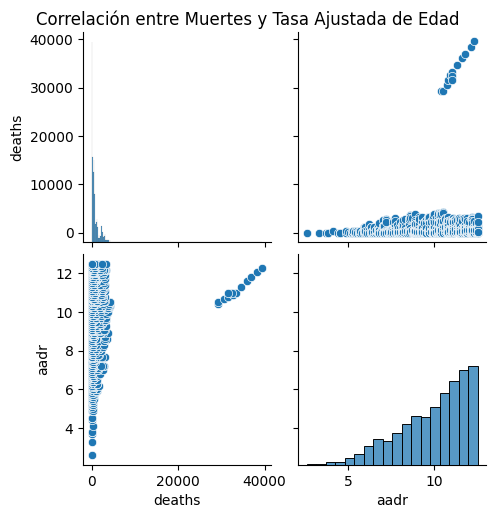

In [9]:
plt.figure(figsize=(10, 8))
sns.pairplot(df_cleaned[['deaths', 'aadr']])
plt.suptitle('Correlación entre Muertes y Tasa Ajustada de Edad', y=1.02)
plt.show()

Muertes agrupadas por estado y causa

In [10]:
state_cause_group = df_cleaned.groupby(['state', 'cause_name'])['deaths'].sum().unstack().fillna(0)
print("Muertes agrupadas por Estado y Causa:\n", state_cause_group.head())

Muertes agrupadas por Estado y Causa:
 cause_name  Alzheimer's disease  Diabetes  Influenza and pneumonia  \
state                                                                
Alabama                     0.0       0.0                      0.0   
Alaska                     24.0       0.0                    271.0   
Arizona                     0.0       0.0                   6232.0   
California                  0.0       0.0                      0.0   
Colorado                    0.0       0.0                   3450.0   

cause_name  Kidney disease  Suicide  
state                                
Alabama                0.0   3795.0  
Alaska               552.0      0.0  
Arizona             9257.0      0.0  
California         52273.0  69424.0  
Colorado            7792.0      0.0  


Boxplot de la tasa ajustada de mortalidad por edad (AADR) por año


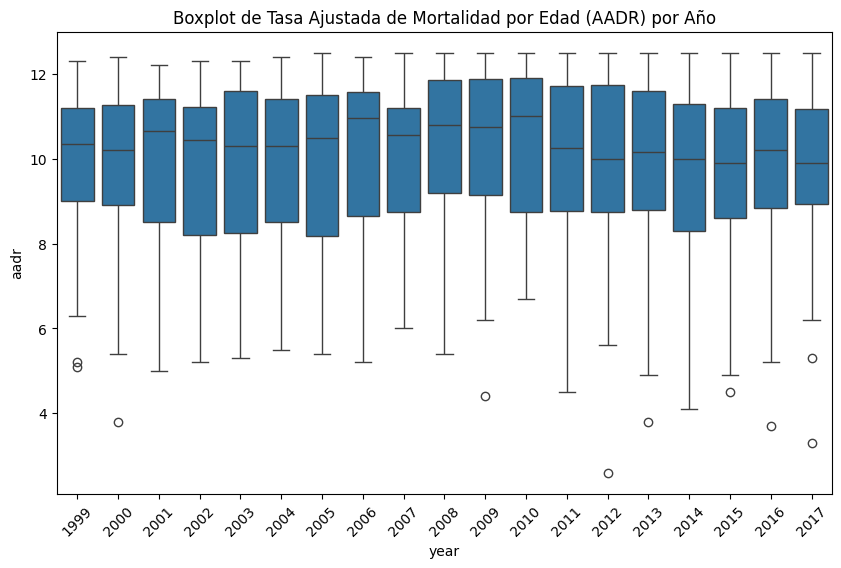

In [11]:
# Boxplot de AADR por año
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='aadr', data=df_cleaned)
plt.title('Boxplot de Tasa Ajustada de Mortalidad por Edad (AADR) por Año')
plt.xticks(rotation=45)
plt.show()

Exportar

In [12]:
output_file_path = "cleaned_cdc_data.csv"  
df_cleaned.to_csv(output_file_path, index=False)
print(f"Datos limpios exportados a {output_file_path}")

Datos limpios exportados a cleaned_cdc_data.csv


E.D.A para DATASET YA LIMPIO

   year                                    _113_cause_name      cause_name  \
0  2012  Nephritis, nephrotic syndrome and nephrosis (N...  Kidney disease   
1  2017  Nephritis, nephrotic syndrome and nephrosis (N...  Kidney disease   
2  2016  Nephritis, nephrotic syndrome and nephrosis (N...  Kidney disease   
3  2013  Nephritis, nephrotic syndrome and nephrosis (N...  Kidney disease   
4  2000  Intentional self-harm (suicide) (*U03,X60-X84,...         Suicide   

                  state  deaths  aadr  
0               Vermont      21   2.6  
1               Vermont      29   3.3  
2               Vermont      30   3.7  
3               Vermont      30   3.8  
4  District of Columbia      23   3.8  
              year        deaths         aadr
count  1000.000000   1000.000000  1000.000000
mean   2007.702000   1160.494000     9.931500
std       5.564185   3832.087922     1.966541
min    1999.000000     21.000000     2.600000
25%    2003.000000    151.750000     8.700000
50%    2008.000

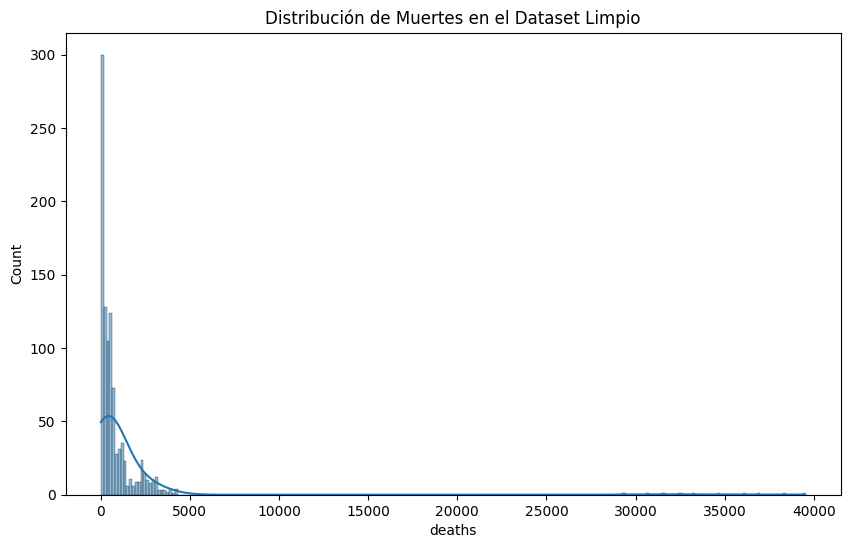

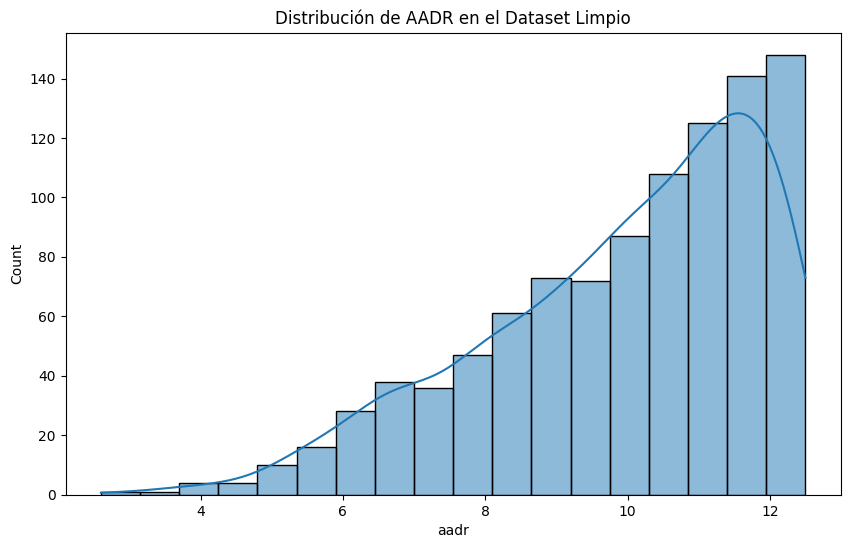

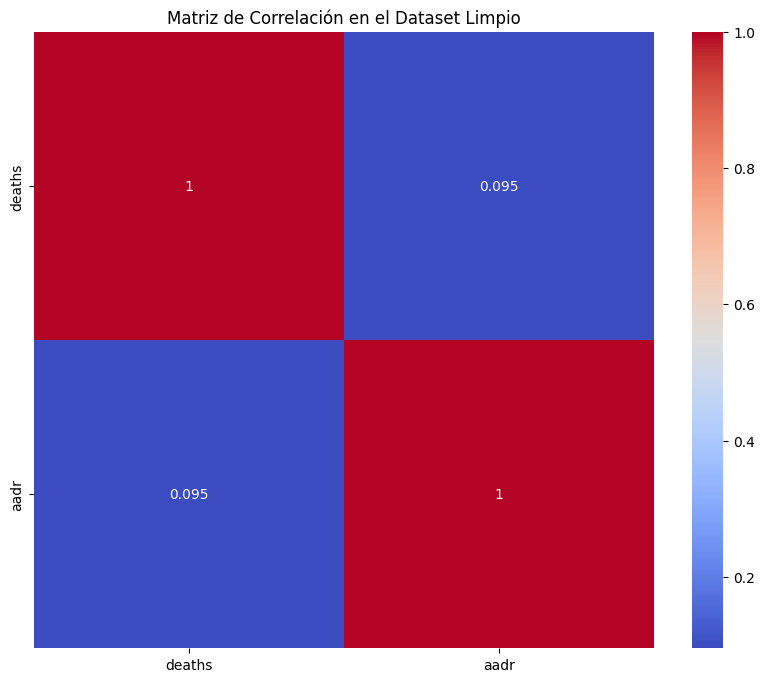

In [13]:
# dataset limpio
df_cleaned_final = pd.read_csv(output_file_path)

# EDA adicional al dataset limpio

print(df_cleaned_final.head())

print(df_cleaned_final.describe())

print(df_cleaned_final.info())

print(df_cleaned_final.isnull().sum())

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_final['deaths'], kde=True)
plt.title('Distribución de Muertes en el Dataset Limpio')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_final['aadr'], kde=True)
plt.title('Distribución de AADR en el Dataset Limpio')
plt.show()

# correlación entre variables clave
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned_final[['deaths', 'aadr']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación en el Dataset Limpio')
plt.show()